# Assignment 03

Dear Team,

I hope you are doing GREAT!

The following assignment is divided in two parts:
- Part A: Please, run the pre-coded cells to see and understand how Convolution 2D kernel works and, at the end, respond to the questions 01 and 02
- Part B: Please, run the pre-coded cells to train the given Neural Network and then respond to the questions 03 to 10

The idea of the current assignment is to intensify what we have learned about Convolutional Neural Networks (chapter 5 of the *Deep Learning With Python* book).

There are some new concepts and challenges that we will face in the current assignment, and we need to resolve each issue and move to the next step.

The assignment is easy to follow yet needs the patience to solve each question at a time.

**Note:**

Please note that every question has 0.5 and it provides five out of total ten marks for the assignment.

The video presentation, as you have done for previous assignments, provides the rest of the mark, which is 5.

In short, 5 for coding + 5 for the video presentation = 10.

# PART A

##MATIAS HERTER - 101272358


## Image Convolution

In [3]:
# Import the necessary packages and libraries
import numpy as np
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import BytesIO

## Import the image

In [4]:
# Get the image from the URL
response = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAHCp2ppBbfcPk9S5nE8gFFsZpDh0Exv9qUKXjehk_QszZHsV_pw&s')

In [5]:
# Visualize the content of the response
print(response.content)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x13\x12\x15\x13\x13\x12\x16\x16\x15\x15\x17\x17\x16\x15\x17\x18\x17\x17\x17\x17\x17\x17\x15\x15\x16\x17\x15\x17\x15\x19\x19\x1d( \x18\x1b&\x1b\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1b-&\x1e%--------------------+--//--------/----------------\xff\xc0\x00\x11\x08\x00\x8c\x01g\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x05\x06\x01\x07\x08\xff\xc4\x00L\x10\x00\x02\x00\x03\x05\x04\x06\x06\x05\t\x06\x05\x05\x01\x00\x00\x01\x02\x00\x03\x11\x04\x05\x12!1\x06AQq\x07\x13a\x81\x91\xa1"2Br\xb1\xc1#R\xd1\xe1\xf03Cb\x82\x92\xa2\xb2\xc2\xd2\x08\x14DSs\x93\x16\x17ET\xf14c\xa3\xb3\xe2\x15\xff\xc4\x00\x1b\x01\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00<\x11\x00\x02\x01\x02\x02\x06\x06\n\x00\x04\x07\x01\x00\x00\x00\

In [6]:
# BytesIO() buffers the image into the RAM
# Image.open() opens the buffered image
# np.array() transforms the image into a 3D array containing values from 0-255 corresponding to the RGB colour channels
input_img_arr = np.array(Image.open(BytesIO(response.content)))

## First let’s see the Image.




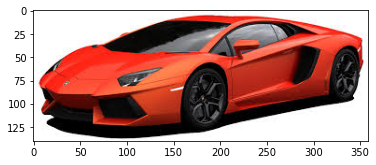

In [7]:
# Plot the resulting image from the array
plt.imshow(input_img_arr)

In [8]:
# Print the array shape
print(input_img_arr.shape)

# Compare the values of colour channels 0 and 1
print(np.array_equal(
        input_img_arr[:, :, 0],
        input_img_arr[:, :, 1]))

# Compare the values of colour channels 1 and 2
print(np.array_equal(
        input_img_arr[:, :, 1],
        input_img_arr[:, :, 2]))

(140, 359, 3)
False
False


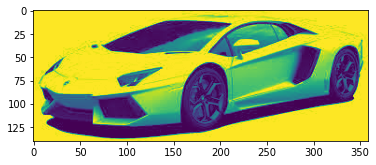

In [9]:
# Save the colour channel 0 in to the input_img_arr array variable and print it
input_img_arr = input_img_arr[:, :, 0]
plt.imshow(input_img_arr)

In [10]:
# Visualize the values inside of the resulting array
input_img_arr[:, :]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

## Convolution with 2-D Kernels

How Convolution works?
https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif

In [11]:
# Create a padded array by adding 2 rows and 2 columns (one of each at the beginning and another of each at the end)
padded_array = np.pad(input_img_arr, (1, 1), 'constant')

# Create the kernel
kernel = np.array([[0, 0, 0], 
                   [0, 1, 0], 
                   [0, 0, 0]])

#Create an output array filled with zeros with the same shape of input_img_arr
output_array = np.zeros(input_img_arr.shape)

In [12]:
#Compare both arrays
print("Original array shape:",input_img_arr.shape)
print("Padded array shape:",padded_array.shape)

Original array shape: (140, 359)
Padded array shape: (142, 361)


In [13]:
#Apply the kernel to the array values
for i in range(padded_array.shape[0]-2):
    for j in range(padded_array.shape[1]-2):
        temp_array = padded_array[i:i+3, j:j+3]
        output_array[i, j] = np.sum(temp_array*kernel)

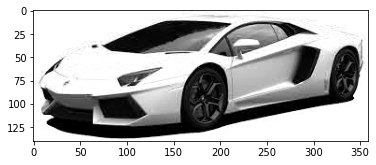

In [14]:
#Plot the resulting array
plt.imshow(output_array, cmap = plt.get_cmap('gray'))

## Standard Convolution

In [15]:
# Define a function to squash out the values between 0-255 range. 
# This function will be called in the following function since the resulting array values can be negative or greater than 255
def squash_pixel_value(value):
    if value < 0:
        return 0
    elif value < 255:
        return value
    else:
        return 255

In [16]:
#Define a function to apply a Conv 2D Kernel to an image
def conv_2d_kernel(image_array_2d, kernel, squash_pixels = True):
    padded_array = np.pad(image_array_2d, (1, 1), 'constant')
    
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]
    
    transformed_array = np.zeros(image_array_2d.shape)
 
    for i in range(padded_array.shape[0] - kernel_width + 1):
        for j in range(padded_array.shape[1] - kernel_height + 1):
            temp_array = padded_array[i:i+kernel_width, j:j+kernel_height]
            if squash_pixels:
                transformed_array[i, j] = squash_pixel_value(np.sum(temp_array*kernel))
            else:
                transformed_array[i, j] = np.sum(temp_array*kernel)
    return transformed_array

## Line detection
With image convolutions, you can easily detect lines. Here are four convolutions to detect horizontal, vertical and lines at 45 degrees:

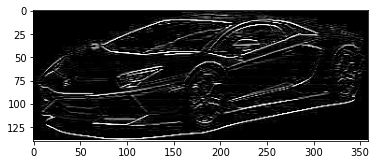

In [17]:
#Create a kernel to detect horizontal lines
horizontal_kernel = np.array([[-1, -1, -1],
                              [2, 2, 2],
                              [-1, -1, -1]])

#Apply the kernel to the image
transf_horizontal = conv_2d_kernel(input_img_arr, kernel = horizontal_kernel)

#Plot the resulting image
plt.imshow(transf_horizontal, cmap = plt.get_cmap('gray'))

### Questions 01-a and 01-b

#### 01-a: Based on the kernels represented on the above image, create a kernel to detect 45 degree lines using convolution, apply to the car's image and plot the result

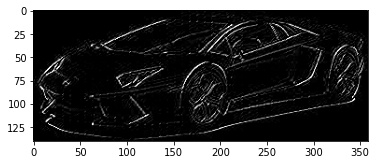

In [18]:
# Type your code here

kernel_45_degree = np.array([[-1, -1, 2],
                              [-1, 2, -1],
                              [2, -1, -1]])

transf_45_degree = conv_2d_kernel(input_img_arr, kernel = kernel_45_degree)

plt.imshow(transf_45_degree, cmap = plt.get_cmap('gray'))


#### 01-b: Based on the kernels represented on the above image, create a kernel to detect 135 degree lines using convolution, apply to the car's image and plot the result

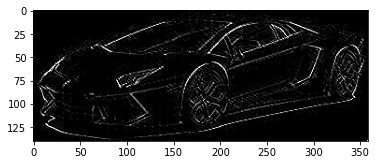

In [19]:
# Type your code here
kernel_135_degree = np.array([[2, -1, -1],
                              [-1, 2, -1],
                              [-1, -1, 2]])

transf_135_degree = conv_2d_kernel(input_img_arr, kernel = kernel_135_degree)

plt.imshow(transf_135_degree, cmap = plt.get_cmap('gray'))

## Edge Detection

### Question 02: Apply the following kernels to your image and plot the output

#### 02-a:

In [20]:
edge_kernel_1 = np.array([[1, 0, -1],
                          [0, 0, 0],
                          [-1, 0, 1]])

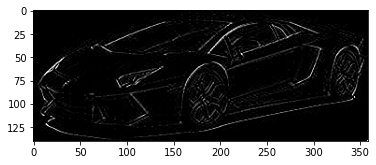

In [21]:
# Type your code here
transf_edge_1 = conv_2d_kernel(input_img_arr, kernel = edge_kernel_1)

plt.imshow(transf_edge_1, cmap = plt.get_cmap('gray'))


#### 02-b:

In [22]:
edge_kernel_2 = np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])

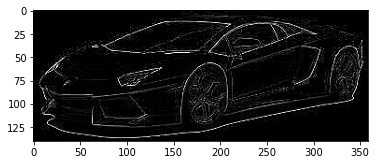

In [23]:
# Type your code here
transf_edge_2 = conv_2d_kernel(input_img_arr, kernel = edge_kernel_2)

plt.imshow(transf_edge_2, cmap = plt.get_cmap('gray'))


#### 02-c:

In [24]:
edge_kernel_3 = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])

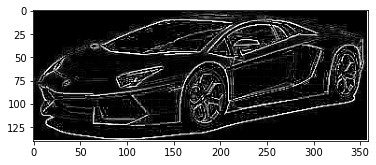

In [25]:
# Type your code here

transf_edge_3 = conv_2d_kernel(input_img_arr, kernel = edge_kernel_3)

plt.imshow(transf_edge_3, cmap = plt.get_cmap('gray'))


# PART B

## Importing Libraries

In [26]:
# Import the necessary packages and libraries
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.datasets import cifar10

## Preparing the dataset

Read more about cifar10 dataset here 
https://www.cs.toronto.edu/~kriz/cifar.html

In [27]:
#load the dataset
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [28]:
# one hot encode target values
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

# convert from integers to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

## Building the neural network model

In [29]:
# Create the model
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same', 
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Flatten(),        
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

In [30]:
# Model compilation
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Display a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,050,890
Trainable params: 1,050,890
Non-trainable params: 0
______________________________________________

## CustomCallback class for logging

In [32]:
# Create a Custom Callback class to be called during the training
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(epoch % 5 ==0):
      print(" Finished epoch #",epoch)
      print('Accuracy resched train is',logs.get('accuracy'))
      print('Accuracy reached val is',logs.get('val_accuracy'))
      print()
      return

In [33]:
# Instantiate the Custom Callback
cc=CustomCallback()

## Training the Nework

In [34]:
# Train the Network with train_images and train_labels
history = model.fit(train_images, 
                    train_labels, 
                    epochs=50, 
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.37310001254081726
Accuracy reached val is 0.4643000066280365

 Finished epoch # 5
Accuracy resched train is 0.6341599822044373
Accuracy reached val is 0.6148999929428101

 Finished epoch # 10
Accuracy resched train is 0.6981599926948547
Accuracy reached val is 0.6385999917984009

 Finished epoch # 15
Accuracy resched train is 0.7388799786567688
Accuracy reached val is 0.6564000248908997

 Finished epoch # 20
Accuracy resched train is 0.7710999846458435
Accuracy reached val is 0.6593000292778015

 Finished epoch # 25
Accuracy resched train is 0.8031600117683411
Accuracy reached val is 0.6624000072479248

 Finished epoch # 30
Accuracy resched train is 0.8265200257301331
Accuracy reached val is 0.6581000089645386

 Finished epoch # 35
Accuracy resched train is 0.8488199710845947
Accuracy reached val is 0.6481999754905701

 Finished epoch # 40
Accuracy resched train is 0.8768600225448608
Accuracy reached val is 0.650600016117096

 Finished ep

## Plotting the Results

In [35]:
# Define a function to plot the results
def result_plotting():
  plt.figure(figsize=[8,6])
  plt.plot(history.history['accuracy'],'blue',linewidth=3.0)
  plt.plot(history.history['val_accuracy'],'red',ls='--',linewidth=3.0)
  plt.legend(['Training Accuracy','Validaion Accuracy'],fontsize=18,loc='lower right')
  plt.xlabel('Epochs',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)

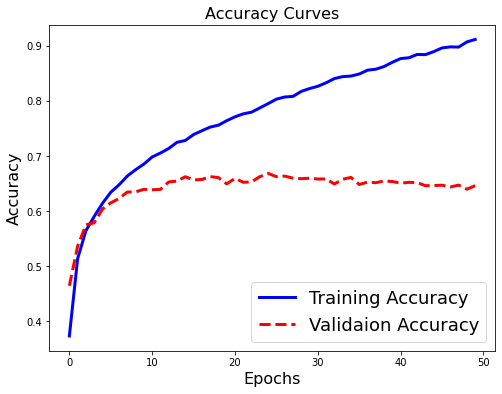

In [36]:
# Call the result_plotting() function
result_plotting()

### Questions 03 to 10

#### 03: Did the network presented signs of overfitting? If so, in which epoch?

Yes, as we can see, the validation stop its improvement around epoch 20, showing signs of overfitting 


#### 04: Write down how many layers this model has and identify their types

5 layers being:
-2D convolutional Layer
-max pooling layer
-flattering layer
-dense layer Relu
-dense layer softmax

#### 05: Briefly explain what is the purpose of each of those layers

Convolutional Layer - Takes chunks of the image to be analised converting all the pixels in its receptive field into a single value.

Max Pooling layer - Calculates the maximum or largest value in each path of each feature map, shrinking the image we had before 

Flattering Layer - converts the data into a 1D array

Dense Layer Relu - zero out any possible negative values

Dense Layer Softmax - Output layer

#### 06: Add one or more Convolution layers to your model and run it again.

> Hint: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2.  run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function

In [37]:
# Type your code here
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same', 
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Conv2D(32, (3,3), padding='same', 
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),                
          keras.layers.Flatten(),        
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

In [38]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images, 
                    train_labels, 
                    epochs=50, 
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.4255400002002716
Accuracy reached val is 0.5131999850273132

 Finished epoch # 5
Accuracy resched train is 0.6765599846839905
Accuracy reached val is 0.6643000245094299

 Finished epoch # 10
Accuracy resched train is 0.7379199862480164
Accuracy reached val is 0.6830000281333923

 Finished epoch # 15
Accuracy resched train is 0.7888399958610535
Accuracy reached val is 0.7045999765396118

 Finished epoch # 20
Accuracy resched train is 0.8353800177574158
Accuracy reached val is 0.6947000026702881

 Finished epoch # 25
Accuracy resched train is 0.8779399991035461
Accuracy reached val is 0.7005000114440918

 Finished epoch # 30
Accuracy resched train is 0.9113399982452393
Accuracy reached val is 0.6884999871253967

 Finished epoch # 35
Accuracy resched train is 0.9439200162887573
Accuracy reached val is 0.689300000667572

 Finished epoch # 40
Accuracy resched train is 0.9682999849319458
Accuracy reached val is 0.6851999759674072

 Finished epo

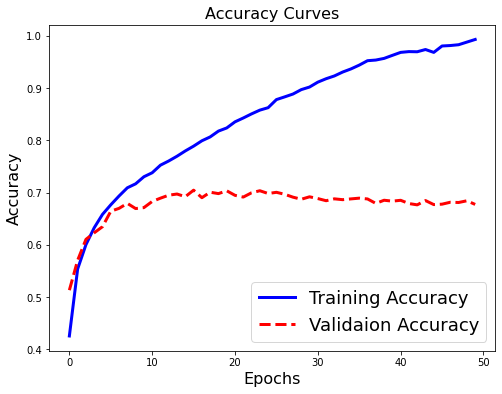

In [39]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 07: Compare the results and describe what are the differences between them.

Not much difference from one to another, probably because I used the same convolutional layer twice. We can see that the training and accuracy graphics are a bit different in some parts but not much. Accuracy at epoch 10 went up a bit, reaching almost 0.7

#### 08: Add a dropout layer to your model, run it, and compare the result with the previous one.

> Hint 1: Here is a good explanation on how dropouts work https://www.youtube.com/watch?v=bRyOi0L6Rs8

> Hint 2: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2. run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function




In [41]:
# Type your code here
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same', 
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Conv2D(32, (3,3), padding='same', 
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),                
          keras.layers.Flatten(),    
          keras.layers.Dropout(0.5),    
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])


In [42]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images, 
                    train_labels, 
                    epochs=50, 
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.398360013961792
Accuracy reached val is 0.5001000165939331

 Finished epoch # 5
Accuracy resched train is 0.6279199719429016
Accuracy reached val is 0.6527000069618225

 Finished epoch # 10
Accuracy resched train is 0.6891800165176392
Accuracy reached val is 0.6949999928474426

 Finished epoch # 15
Accuracy resched train is 0.7225800156593323
Accuracy reached val is 0.7121999859809875

 Finished epoch # 20
Accuracy resched train is 0.7527599930763245
Accuracy reached val is 0.7263000011444092

 Finished epoch # 25
Accuracy resched train is 0.7769799828529358
Accuracy reached val is 0.7387999892234802

 Finished epoch # 30
Accuracy resched train is 0.7958599925041199
Accuracy reached val is 0.7452999949455261

 Finished epoch # 35
Accuracy resched train is 0.8107600212097168
Accuracy reached val is 0.746999979019165

 Finished epoch # 40
Accuracy resched train is 0.8224800229072571
Accuracy reached val is 0.7508999705314636

 Finished epoc

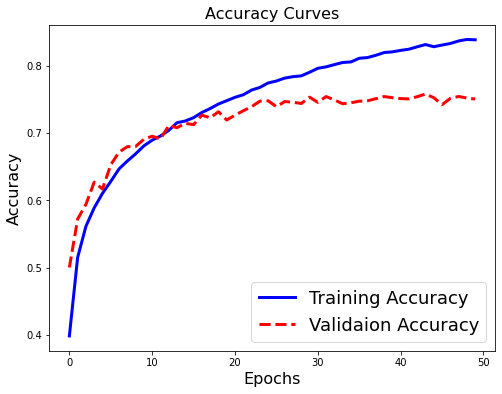

In [43]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 09: Explain with your own words what is the purpose of a dropout layer and how it works.

Is a technique where randomly selected neurons are ignored during training(set to 0). In this case we are doing it to 50% of our data


#### 10: Make any other modification in the hyperparameters to improve the model's accuracy and compare the final result with the previous one.
> Hint: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2. run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function

In [47]:
# Type your answer here
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same', 
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Conv2D(64, (3,3), padding='same', 
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),                
          keras.layers.Flatten(),    
          keras.layers.Dropout(0.25),    
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])


In [48]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images, 
                    train_labels, 
                    epochs=50, 
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.420199990272522
Accuracy reached val is 0.5073999762535095

 Finished epoch # 5
Accuracy resched train is 0.67985999584198
Accuracy reached val is 0.650600016117096

 Finished epoch # 10
Accuracy resched train is 0.7373999953269958
Accuracy reached val is 0.7164999842643738

 Finished epoch # 15
Accuracy resched train is 0.7851200103759766
Accuracy reached val is 0.7336000204086304

 Finished epoch # 20
Accuracy resched train is 0.8282999992370605
Accuracy reached val is 0.7283999919891357

 Finished epoch # 25
Accuracy resched train is 0.8600000143051147
Accuracy reached val is 0.7285000085830688

 Finished epoch # 30
Accuracy resched train is 0.8866999745368958
Accuracy reached val is 0.7348999977111816

 Finished epoch # 35
Accuracy resched train is 0.9093400239944458
Accuracy reached val is 0.7325000166893005

 Finished epoch # 40
Accuracy resched train is 0.9258000254631042
Accuracy reached val is 0.733299970626831

 Finished epoch #

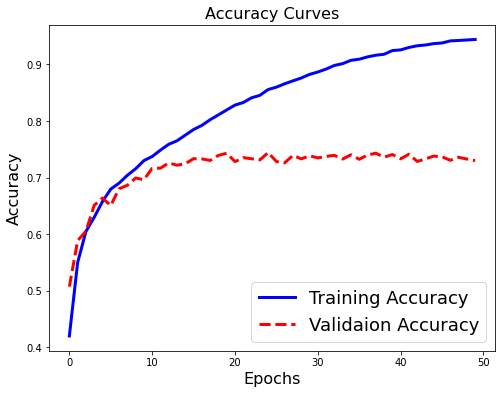

In [49]:
# Call the result_plotting() to display the results from your code
result_plotting()

---
# Deliverables:
1. Please, submit the current ipynb file with your responses.
2. Please record and upload to YouTube a 5 to 10 minutes video recorded clip, describing all you have done. If you go beyond 10 minutes, it is fine. The mentioned time range is to show how the scale of the assignment could be.  
Then submit the link to the uploaded YouTube video in the **Text Submision section** (see image below).  

![image.png](https://i.ibb.co/gjW5wYC/bb-submission-instructions.png)


**Summary:**

In short, what we need to submit are:

a)	The current **ipynb file** that contains all the code (5 marks).

b)	The **YouTube link** of your recorded video in the **Text Submission section** (5 marks).


All my best,

Reza
